In [4]:
# import all the required Libraries
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
import math as math
import warnings
warnings.filterwarnings("ignore")
from IPython import display
import networkx as nx

### Some Foundamental Geometrical Concept 

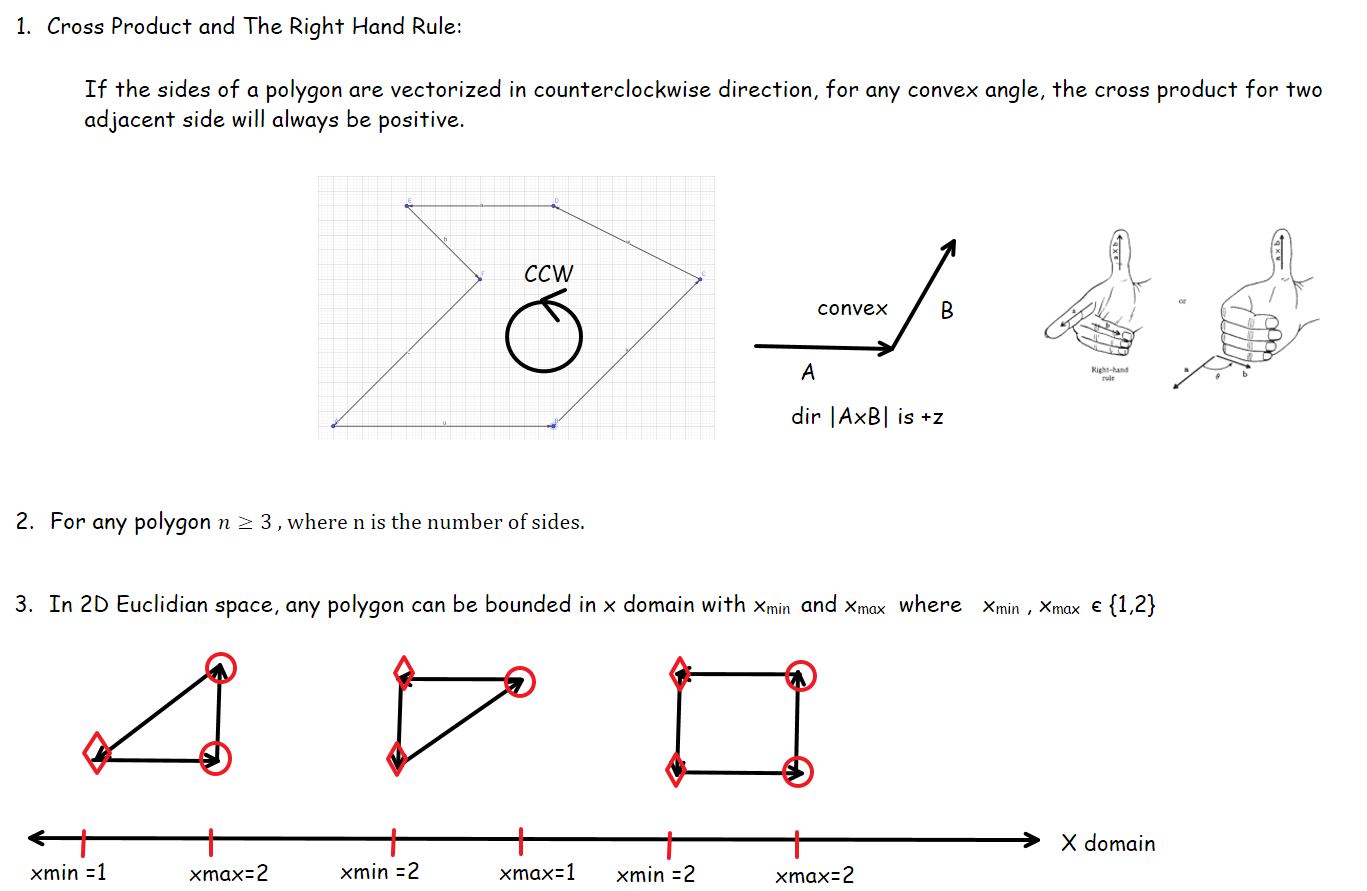

In [5]:
display.Image("./Foundamental_Principle.png")

### Strategy for Crafting Algorithm

#### Analyze the Polygon
1. How many Non-Convex points? Apply cross product rule.
2. Bound x domain to find extreme left/right points.
3. convex vertices = (number of sides/all angles) - (Non-convex points). *** convex points/vertices includes two extream points/vertices
4. Convex points located between two extream points(middle convex) = num convex- num extream points

After these steps there should be three sets:


$$ \Rightarrow Set \ 1 = \{Convex \ points \ located \ between \ two \ extream \ points\} $$
$$ \Rightarrow Set \ 2 = \{Extream \ verticies\} $$
$$ \Rightarrow Set \ 3 = \{Concave \  points\} $$

### Trapizoidation of Workplane

1. Segment parallel to y axis through extream vertices/points. These two segments will bound the polygon within X domain.In the case of 2 xmin/xmax points, using just one point is sufficient.

2. *Shortest Segments parallel to y axis from CONVEX points to the X axis of the workplane.
3. Segment between two adjacent CONVEX verticies of a NON-CONVEX vertex.

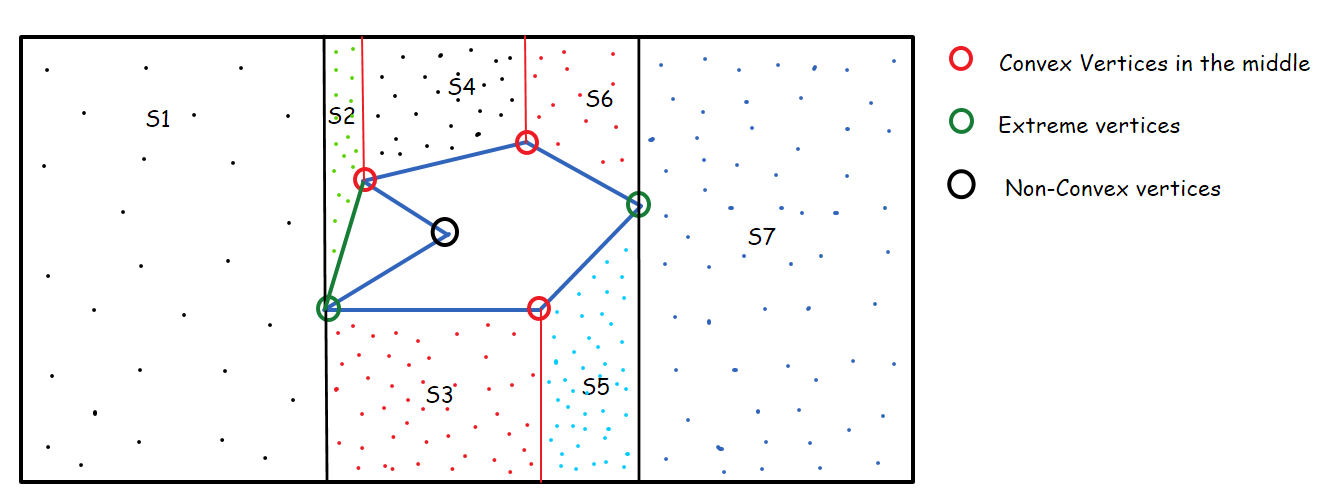

In [6]:
display.Image("./Trap.png")

In [2]:
# Trapezoidation class
class Trapezoidation:
    
    #  constructor
    def __init__(self):
        print("---------")
        
        
        
#------------------------------------------Methods------------------------------------------------------------------
        
    # Find Non-Convex vertices and their counts
    def PolyNonConvex(self,arg):
        
        """ 
        Author: Arif
        Input Argument  : Arg1: Set of Polygon Vertices 
        
        Output Argument : Returns: Arg1,Arg2: NON-CONVEX vertices, number of NON-CONVEX vertices.
        """
    
    
        #---------------Process input data---------------
        x,y = zip(*arg)  # store x and y coordinate values of vertices in a separate list 
       
    
        # convert into numpy array
        xcoor = np.array(x)
        ycoor = np.array(y)
        A     = np.zeros((2,len(x)-2))  # a 2(row) x len(x)-2 array to store the xcoor index values for inner angle vertices
    
   
    
        # -----------------------------------------------find the cross product of vector in counter-clockwise manner
    
        # initialize index var for iteration
        indx = 1  
        indA = 0
    
        while(indx<len(x)-1):  # loop through x and y coordinate array 
        
            vec1 = [xcoor[indx]-xcoor[indx-1],ycoor[indx]-ycoor[indx-1]]   # 1st vector (vertex i -> vertex j  )     j is the vertex with targeted angle
            vec2 = [xcoor[indx+1]-xcoor[indx],ycoor[indx+1]-ycoor[indx]]   # 2nd vector (vertex j -> vertex k)
        
            crossprod = np.cross(vec1,vec2)  # calculate cross product in counter clockwise manner
            if(crossprod<0):
                    # if cross product is negative that means the angle is an insider
                    A[0][indA] = xcoor[indx]  # store the x-coordinate of vertex with inside angle
                    A[1][indA] = ycoor[indx]  # store the y-coordinate of vertex with inside angle
                    indA=indA+1      # increase the A array index
            else:
                    
                    A[0][indA] = 131.25  # just a random number to keep track of empty space
                    A[1][indA] = 131.25  # jsut a random number to keep track of empty array space
                    indA=indA+1      # increase the A array index
                
            indx =indx+1 # increas while loop index
        
        # lets find out the number of non-convex vertices 
        count = 0 # initialize counter variable 
        i = 0     # initialize iterator variable
     
        while(i<len(A[0][:])):    # counts number of inside vertices 
            if(A[0][i]!=131.25):  # if theres no match with pre defined integer taht the non-convex vertex coordinate
                count=count+1;    # count 
            i=i+1                 # next iteration
    
     
        # now we will construct our final result array which will include non-convex vertices coordinates   
        NonConvex = np.zeros((2,count)) # initizalize the array
    
        k=0            # loop iterator
        indx = 0       # index variable
        while(k<len(A[0][:])):    # loop until you cover length of array A
            if(A[0][k]!=131.25):  # we dont want this boring number but the actual coordinate 
                NonConvex[indx][0]=A[0][k] # store x,y location
                NonConvex[indx][1]=A[1][k] # store x,y lcoation
                k=k+1        # next iteration
                indx=indx+1  # increase index value
            else: # is we dont find actual coordinate
                k=k+1 # go to next iteration
        
    
    
        return NonConvex, count
    
    
    # Find extreme vertices within X domain
    def PolyXMinMax(self,arg):
        
        """ 
        Author: Arif
        Input Argument  : Arg1: Set of Polygon Vertices 
        
        Output Argument : Returns: Arg1,Arg2: [ [xmax , xmin ] , [xmaxy, xaminy] ]
        """
       
    
           
            
        #---------------Process input data---------------
        x,y = zip(*arg)  # store x and y coordinate values of vertices in a separate list 
     
        # convert into numpy array
        xcoor = np.array(x)
        ycoor = np.array(y)
    
        xmin = np.amin(xcoor) # find min x
    
        xmax = np.amax(xcoor) # max x
    
        # array indeces
        i = 0
        k = 0
        while(i<len(x)):    # find y coordinate for vertex with min x coordinate
            if(xmin==xcoor[i]):
                xminy = ycoor[i]
                break
            else:
                i=i+1
        
        while(k<len(x)):  # find y coordinate for vertex with max x coordinate
            if(xmax==xcoor[k]):
                xmaxy = ycoor[k]
                break
            else:
                k=k+1
            
            B = np.zeros((2,2)) # initialize the array for max min x coordinate.
    
        # store the extream left and right vertex values
        B[0][0]= xmin
        B[0][1]= xminy
        B[1][0]= xmax
        B[1][1]= xmaxy
        
        B = B.tolist()
    
        return B
    
    
    # Graph the Vectorized Polygon
    def PolyPlot(self,arg):
        
        """ 
        Author: Arif
        Input Argument  : Arg1: Set of Polygon Vertices 
        
        Output Argument : Returns: Arg1,Arg2: [ [xmax , xmin ] , [xmaxy, xaminy] ]
        """
        
        
        x2,y2 = zip(*arg)                # x and y coordinate for polygon
    
        plt.figure(dpi=100)              # graph window size
    
    
        # vectorize the polygan in counter clockwise manner
    
        ax=plt.axes()
    
        # convert into numpy array
        xcoor = np.array(x2)
        ycoor = np.array(y2)
    
    
        indx=0 # index for arrays
    
        while(indx<len(x2)-1):
            
        
            ax.arrow(xcoor[indx], ycoor[indx], xcoor[indx+1]-xcoor[indx], ycoor[indx+1]-ycoor[indx], head_width=.5, head_length=1,  fc='lightblue', ec='black')
        
            indx+=1
    
    
        plt.title("Vectorized Polygon")
    
    
    
        return
    
    
    def WrkSpcPlot(self,arg1,arg2):
        
        """ 
        Author: Arif
        Input Argument  : arg 1: workspace points (include 1st point twice. append to the end of the array)
                          arg 2: polygon vertices (include 1st point twice. append at the end of the array)  
        
        Output Argument : Returns: Graph of total workspace with polygon
        """ 
     
    
    
        x1,y1 = zip(*arg1)               # x coordinate and y coordinate for worksapce
        x2,y2 = zip(*arg2)               # x and y coordinate for polygon
    
        plt.figure(dpi=100)              # graph window size
        plt.title("Workspace plot")
        plt.plot(x1,y1,'-o'), plt.plot(x2,y2,'-o')
        
        
        return

    # Finds Convex vertices located between two extreme vertices
    def PolyMidConvex(self,arg):
    
        """ 
        Author: Arif
        Input Argument  : arg 1: workspace points (include 1st point twice. append to the end of the array)
                          arg 2: polygon vertices (include 1st point twice. append at the end of the array)  
        
        Output Argument : Returns: Graph of total workspace with polygon
        """ 
        
        Convex = []              # Initialize an array for convex vertices
        
        MainConvex = []
        
        Trap = Trapezoidation()  # create an instance
        
        NonConv,NumNonConv = Trap.PolyNonConvex(arg) # array of non convex vertices
        
        Extreme  = Trap.PolyXMinMax(arg)   # Extreme vertices
        
        NonConv = NonConv.tolist()         # convert numpy array to list
        
        #Extreme = Extreme.tolist()         # convert numpy array to list
        
        indxout = 0            # outer loop iterator to find matches with Non-Convex Vertices
        
        indxin  = 0            # inner loop iterator to find matches with Non-Convex Vertices           
        
        NumVer = len(arg)-1 # number of vertices. Using first vertex twice due to graphing purpose. Thats why len(arg)-1
        
        NumExt = len(Extreme)
        
        TrackIn = []   # this array keeps track off entry. we dont want same entry twice
        Match   = []   # keeps track of matches with non convex vertices
        ExMatch = []   # keeps track of matches with extreme vertices
        
        for i in range(0,NumVer):     # initialize with 0. 
            TrackIn.insert(0, 0)
        
        for j in range(0,NumNonConv): # initialize with 0
            Match.insert(0, 0)
            

            
       
        #---------------------------- Find Polygon Convex vertices located in the middle---------------------------------------
        
       # find matches with non-convex vertices 
        
        while(indxout<NumVer):  # outer loop
            
            while(indxin<NumNonConv): # inner loop
                
                
                if(arg[indxout]!=NonConv[indxin] and TrackIn[indxout]==0 and Match[indxin]==0): # TRUE when... There is no match, first time entry, first time matching 
                    
                    Convex.insert(len(Convex), arg[indxout])  
                    
                    TrackIn[indxout]=1; # track the entry by turning 0 to 1 for this index
                    
                    indxin = indxin+1   # go to next inner loop iteration
                    
                    
                elif(arg[indxout]==NonConv[indxin]):  # when there is a match we have to keep track of this match
                    
                    Match[indxin]=1     # match array index goes 0 to 1
                    
                    indxin = indxin+1   # go to next inner loop iteration
                    
                    indxout = indxout+1 # as there was a match, so outer loop also goes to next index
                
                else: # maybe ther was second time entry or second time match
                    indxin = indxin+1 # go to next inner loop iteration
                    
                                 
            
            indxin = 0           # reinitialize inside iterator
            
            indxout = indxout+1  # go to next outer loop iteration
            
            
            
            
            
        # find matches with Extreme vertices    
            
        indxout = 0            # outer loop iterator to find matches with Extreme Vertices
        
        indxin  = 0            # inner loop iterator to find matches with Extreme Vertices           
                    
        TrackIn = []
            
        for i in range(0,len(Convex)):     # initialize with 0. 
            TrackIn.insert(0, 0)
        
            
        for k in range(0,NumExt):          # initialize with 0
            ExMatch.insert(0, 0) 
            
            
        # find matches with extreme vertices
        
        while(indxout<len(Convex)):  # outer loop
            
            while(indxin<NumExt): # inner loop
                
                
                if(Convex[indxout]!=Extreme[indxin] and TrackIn[indxout]==0 and ExMatch[indxin]==0): # TRUE when... There is no match, first time entry, first time matching 
                    
                    MainConvex.insert(len(MainConvex), Convex[indxout])  
                    
                    TrackIn[indxout]=1; # track the entry by turning 0 to 1 for this index
                    
                    indxin = indxin+1   # go to next inner loop iteration
                    
                    
                elif(Convex[indxout]==Extreme[indxin]):  # when there is a match we have to keep track of this match
                    
                    ExMatch[indxin]=1     # match array index goes 0 to 1
                    
                    indxin = indxin+1   # go to next inner loop iteration
                    
                    indxout = indxout+1 # as there was a match, so outer loop also goes to next index
                
                else: # maybe ther was second time entry or second time match
                    indxin = indxin+1 # go to next inner loop iteration
                    
                                 
            
            indxin = 0           # reinitialize inside iterator
            
            indxout = indxout+1  # go to next outer loop iteration
            
            
            
            
        # *****************BUG in while loops for matching
            
        
        return MainConvex
        
        
    # return Max Min y axis of workplane
        
    def MaxMinWorkPlane(self,arg):
        
        """ 
        Author: Arif
        Input Argument  : arg 1: workspace points (include 1st point twice. append to the end of the array)
                          
        
        Output Argument : Returns: Max Min of workspace y coordinate
        """ 
        
        
        x1,y1 = zip(*arg)               # x coordinate and y coordinate for worksapce
        
        
        maxmin = [max(y1), min(y1)]
        
        return maxmin
    
    
    # Equation of line through two points
    def EqLine(self,arg):
        
        """ 
        Author: Arif
        Input Argument  : arg 1: List of Two Points [[x1,y1],[x2,y2]]
                          
        
        Output Argument : Returns: Slope(m) and Y-intersection(c)
        """ 
        
        
        x,y = zip(*arg)
        
        
        Slope = (y[1]-y[0])/(x[1]-x[0])
        
        c     = y[0]- Slope*x[0]
        
        return Slope,c
        
        
    def PointGen(self,arg1,arg2):
        
        """ 
        Author: Arif
        Input Argument  : arg 1: List of workspace vertices
                          arg 2: List of polygon   vertices                        
                          
        
        Output Argument : Returns: paired set of Polygon-Workspace colinear points. [[[xp1 yp1],[xp2 yp2]]]  
        """ 
        
        Trap = Trapezoidation()
        WorkSpaceMaxMin = Trap.MaxMinWorkPlane(arg1)
        
        NumPoint = len(arg2)
        
        x,y = zip(*arg2)     # unpack the list of x y coord and store as tuples
        
        PairPoints = []  # initialize a list to store paired points.
        PairPoints.clear()
        
        indx =0
        
        while(indx<NumPoint):
            
            
            d1 = abs(y[indx]-WorkSpaceMaxMin[0])
        
            d2 = abs(y[indx]-WorkSpaceMaxMin[1])
        
            if(d1<d2 ):
                PairPoints.append([[x[indx],y[indx]],[x[indx],WorkSpaceMaxMin[0]]])
            else:
                PairPoints.append([[x[indx],y[indx]],[x[indx],WorkSpaceMaxMin[1]]])
                
            
            
            indx = indx+1
        
        

            return PairPoints
            
            
        
        
        
        
      # plotting trapizoid
      
    def PairedforExtreme(self,arg1,arg2):
        
        """ 
        Author: Arif
        Input Argument  : arg 1: List of workspace vertices
                          arg 2: List of extreme vertices 
                          
        
        Output Argument : Returns: paired set of Workspace_UP - Workspace_Down colinear points. [[[xp1 yp1(max)],[xp2 yp2(min)]], [[xp3 yp3(max)],[xp4 yp4(min)]]]
        """ 
        
                  
          
        Trap = Trapezoidation()
        
       
        WorkSpaceMaxMin = Trap.MaxMinWorkPlane(arg1)
        
               
        x,y = zip(*arg2)     # unpack the list of x y coord and store as tuples
        
        PairPoints = []  # initialize a list to store paired points.
        PairPoints.clear()
        
        dx1 = abs(x[0]-0)
        
        dx2 = abs(x[1]-0)
        
        
        if(dx1<dx2):
            
            
            PairPoints.append([[x[0],WorkSpaceMaxMin[0]],[x[0],WorkSpaceMaxMin[1]]])
            
            PairPoints.append([[x[1],WorkSpaceMaxMin[0]],[x[1],WorkSpaceMaxMin[1]]] )
                     
              
            
        else:
            
            PairPoints.append([[x[1],WorkSpaceMaxMin[0]],[x[1],WorkSpaceMaxMin[1]]])
            
            PairPoints.append([[x[0],WorkSpaceMaxMin[0]],[x[0],WorkSpaceMaxMin[1]]] ) 
            
            
            
           
            

        
        

        return PairPoints
          
        
    def DesTrapVert(self,arg1,arg2):
        
        """ 
        Author: Arif
        Input Argument  : arg 1: List of workspace vertices
                          arg 2: List of Polygon Vertices
                          
        
        Output Argument : Returns: Vertices of descritized trapizoids from left to right direction.
               
        """
        
        Trap=Trapezoidation()
        
        NonConvexPoints,count=Trap.PolyNonConvex(arg2)

        ExtremePoints = Trap.PolyXMinMax(arg2)
        
        
        MidConv = Trap.PolyMidConvex(arg2)

        MaxMinWorkplane = Trap.MaxMinWorkPlane(arg1)

        
        ConvToWorkspcPoint = Trap.PointGen(workspc, MidConv)

        LeftRightTrap = Trap.PairedforExtreme(workspc, ExtremePoints)  
        
        
        AllPoints = []
        AllPoints.clear()
        
        AllPoints.append([arg1[0],arg1[3]])  
        
        AllPoints.append(ConvToWorkspcPoint) 
        
        AllPoints.append(LeftRightTrap)
        
        
        
        
        
        return AllPoints  # set of descritized trapizoid


#### List of methods for Trapizoidation() class
##### 1. PolyNonConvex() : Finds the NonConvex Vertices
##### 2. PolyXMinMax()   : Finds two extream left and right vertices 
##### 3. PolyPlot()      : Plots Vectorized Polygon
##### 4. WrkSpcPlot()    : Plots the total workspace with polygon
##### 5. PolyMidConvex() : Finds the convex vertices located between two extream vertices    
##### 6. MaxMinWorkPlane(): Finds the left bottom corner and right top corner of the workplane
##### 7. EqLine()         : Finds Slope and Y intercept of the equation through two points
##### 8. PointGen()       : Finds segment points between Convex vertices and workplane boundary.  
##### 9. PairedforExtreme(): Finds segment points between Polygon Extreme vertices and workplane boundary.
##### 10. DesTrapVert()    : Returns all the vertices of descretized workplane trapizoids. 

---------
---------
---------
---------
---------


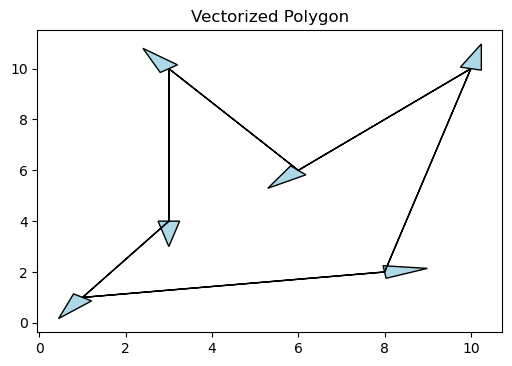

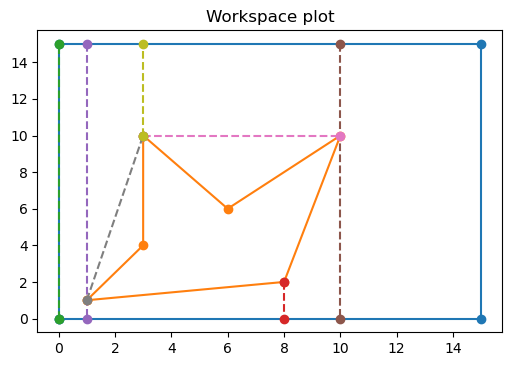


 Set of Vertices of descretized Trapizoids :[[[0, 0], [0, 15]], [[[8, 2], [8, 0]]], [[[1.0, 15], [1.0, 0]], [[10.0, 15], [10.0, 0]]]] 


In [7]:
#-----------------------------------------------------Test Zone---------------------------------------
Trap = Trapezoidation()


mypoly2=[[1,1],[8,2],[10,10],[6,6],[3,10],[3,4],[1,1]] # A test polygon. define the vertices in counter-clockwise manner
workspc =[[0,0],[15,0],[15,15],[0,15],[0,0]]           # A test workspace



NonConvexPoints,count=Trap.PolyNonConvex(mypoly2)

ExtremePoints = Trap.PolyXMinMax(mypoly2)

Trap.PolyPlot(mypoly2)



AllPts = Trap.DesTrapVert(workspc, mypoly2)

Trap.WrkSpcPlot(workspc,mypoly2)
plt.plot(AllPts[0][0],AllPts[0][1],'--o')
plt.plot([8, 8],[2, 0],'--o')
plt.plot([1, 1],[15, 0],'--o')
plt.plot([10, 10],[15, 0],'--o')
plt.plot([3, 10],[10,10],'--o')
plt.plot([1, 3],[1,10],'--o')
plt.plot([3, 3],[10,15],'--o')
plt.show()


print(f'\n Set of Vertices of descretized Trapizoids :{AllPts} ')


##### To deal with multiple colinear obstacles, a ColinearObs() method could be crafted. This method will find the free space between two obstacles by applaying same foundamental principle.